In [1]:
# 필요 패키지 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# matplotlib 한글처리


# matplotlib의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

##### 데이터 불러오기

In [3]:
df= pd.read_csv('성인최종_fin.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '연령대', '나이', '나이구분',
       '상장구분', '신장(cm)', '체중(kg)', '체지방율(%)', '허리둘레(cm)', '이완기혈압(최저)',
       '수축기혈압(최고)', '악력D(kg)', '악력ND(kg)', '윗몸말아올리기(회)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이(초)', '체공시간(초)', '협응력시간(초)', '협응력실수횟수(회)',
       '협응력계산결과값(초)', 'BMI(kg/㎡)', '교차윗몸일으키기(회)', '왕복오래달리기(회)',
       '10M 4회 왕복달리기(초)', '제자리 멀리뛰기(cm)', '의자에앉았다일어서기(회)', '6분걷기(m)',
       '2분제자리걷기(회)', '의자에앉아 3M표적 돌아오기(초)', '8자보행(초)', '상대악력(%)',
       '왕복오래달리기(출력)(VO₂max)', '트레드밀_안정시(bpm)', '트레드밀_3분(bpm)', '트레드밀_6분(bpm)',
       '트레드밀_9분(bpm)', '트레드밀(출력)(VO₂max)', '스텝검사_회복시 심박수(bpm)',
       '스텝검사(출력)(VO₂max)', '허벅지(좌)', '허벅지(우)', '전신반응(초)', '체공시간(초).1', '운동루틴',
       '측정일자', '측정횟수', '센터이름', '테스트형태', '입력자', '성별', '본운동', '준비운동', '마무리운동'],
      dtype='object')

**도메인 지식을 활용하여 필요없는 피처 제거**

In [5]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','허리둘레(cm)','윗몸말아올리기(회)','반복점프(회)','일리노이(초)','체공시간(초)','협응력시간(초)','협응력실수횟수(회)',
                   '협응력계산결과값(초)','의자에앉았다일어서기(회)','6분걷기(m)','2분제자리걷기(회)','의자에앉아 3M표적 돌아오기(초)',
                   '8자보행(초)','트레드밀_안정시(bpm)','트레드밀_3분(bpm)','트레드밀_6분(bpm)','트레드밀_9분(bpm)',
                   '스텝검사_회복시 심박수(bpm)','스텝검사(출력)(VO₂max)','허벅지(좌)','허벅지(우)','전신반응(초)','체공시간(초).1',
                    '트레드밀(출력)(VO₂max)','왕복오래달리기(출력)(VO₂max)','측정일자','상장구분','운동루틴','센터이름','테스트형태',
                    '나이구분','연령대','악력D(kg)','악력ND(kg)','BMI(kg/㎡)','입력자','측정횟수'],axis=1,inplace=True)

In [6]:
df

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),성별,본운동,준비운동,마무리운동
0,19,166.4,59.80,33.54784,77.0,114.0,35.2,35.0,21.0,11.89,170.0,42.6,F,"['Ah003', 'Ak003', 'Ao000', 'Ae028', 'Ag013', ...",['N'],['N']
1,55,159.8,60.00,34.00000,93.0,149.0,13.2,15.0,10.0,17.79,113.0,39.4,F,"['Ce206', 'Ce205', 'Ce202', 'Ce200', 'Ce204']",['N'],['N']
2,52,163.3,62.06,28.60000,78.0,134.0,21.7,22.0,14.0,15.23,130.0,40.9,F,"['Ce204', 'Ce203', 'Ce201', 'Ce170']","['Bq008', 'Bk011', 'Be084']","['Bd024', 'Ba059', 'Ba056', 'Ba055', 'Bq007', ..."
3,33,163.2,74.20,27.50000,72.0,114.0,NaN,32.0,NaN,NaN,200.0,59.4,M,"['Ag029', 'Ae012', 'Aa028', 'De115', 'Ad010', ...",['Ce174'],['N']
4,56,157.0,54.30,35.10000,93.0,155.0,23.5,12.0,NaN,NaN,98.0,40.6,F,"['Ag029', 'Ae012', 'Aa028', 'De115', 'Ad010', ...",['Ce174'],['N']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105583,27,191.2,92.40,22.40000,75.0,148.0,15.1,52.0,NaN,10.02,240.0,67.0,M,"['Ce202', 'Ce201', 'Ce200']","['Ce195', 'Ce194', 'Ce193', 'Be084']","['Bq008', 'Bk011', 'Be085']"
105584,64,158.9,53.30,26.80000,60.0,105.0,4.9,8.0,NaN,12.99,146.0,47.0,F,"['Ak005', 'Aa028', 'Aa027', 'Ag029', 'Ag026', ...","['Bq008', 'Bk011', 'Be085', 'Be084', 'Be083']",['N']
105585,50,165.6,80.90,33.90000,75.0,118.0,19.4,16.0,12.0,15.86,116.0,34.2,F,"['Aa033', 'Aa009', 'Aa031', 'Ac008', 'Ac007', ...","['Bp017', 'Bd024', 'Ba059']",['N']
105586,26,163.6,54.20,28.90000,87.0,135.0,-3.6,13.0,NaN,12.78,142.0,41.3,F,"['Ag029', 'Ag026', 'Ag025', 'Ap007', 'Ap005', ...",['N'],"['Br006', 'Bk010', 'Bs027', 'Bl019', 'Bd024', ..."


##### 군집화 후 특성을 확인하기 위해 데이터 프레임으로 따로 저장

In [7]:
feature_names = ['본운동','준비운동','마무리운동']
exer_df = pd.DataFrame(data=df,columns=feature_names)

In [8]:
exer_df

,본운동,준비운동,마무리운동
0,"['Ah003', 'Ak003', 'Ao000', 'Ae028', 'Ag013', ...",['N'],['N']
1,"['Ce206', 'Ce205', 'Ce202', 'Ce200', 'Ce204']",['N'],['N']
2,"['Ce204', 'Ce203', 'Ce201', 'Ce170']","['Bq008', 'Bk011', 'Be084']","['Bd024', 'Ba059', 'Ba056', 'Ba055', 'Bq007', ..."
3,"['Ag029', 'Ae012', 'Aa028', 'De115', 'Ad010', ...",['Ce174'],['N']
4,"['Ag029', 'Ae012', 'Aa028', 'De115', 'Ad010', ...",['Ce174'],['N']
...,...,...,...
105583,"['Ce202', 'Ce201', 'Ce200']","['Ce195', 'Ce194', 'Ce193', 'Be084']","['Bq008', 'Bk011', 'Be085']"
105584,"['Ak005', 'Aa028', 'Aa027', 'Ag029', 'Ag026', ...","['Bq008', 'Bk011', 'Be085', 'Be084', 'Be083']",['N']
105585,"['Aa033', 'Aa009', 'Aa031', 'Ac008', 'Ac007', ...","['Bp017', 'Bd024', 'Ba059']",['N']
105586,"['Ag029', 'Ag026', 'Ag025', 'Ap007', 'Ap005', ...",['N'],"['Br006', 'Bk010', 'Bs027', 'Bl019', 'Bd024', ..."


In [9]:
df.drop(['본운동','준비운동','마무리운동'],axis=1,inplace=True)

##### Null 값 확인

In [10]:
df.isnull().sum()

나이                     0
신장(cm)                 0
체중(kg)                 0
체지방율(%)                3
이완기혈압(최저)             12
수축기혈압(최고)             10
앉아윗몸앞으로굽히기(cm)       221
교차윗몸일으키기(회)         1454
왕복오래달리기(회)         27131
10M 4회 왕복달리기(초)     5452
제자리 멀리뛰기(cm)        1660
상대악력(%)               48
성별                     0
dtype: int64

##### NA 값 제거

In [11]:
df = df.dropna(subset=['체지방율(%)','이완기혈압(최저)','수축기혈압(최고)','왕복오래달리기(회)',
                       '앉아윗몸앞으로굽히기(cm)','교차윗몸일으키기(회)','10M 4회 왕복달리기(초)','제자리 멀리뛰기(cm)','상대악력(%)'])

In [12]:
df.isnull().sum()

나이                 0
신장(cm)             0
체중(kg)             0
체지방율(%)            0
이완기혈압(최저)          0
수축기혈압(최고)          0
앉아윗몸앞으로굽히기(cm)     0
교차윗몸일으키기(회)        0
왕복오래달리기(회)         0
10M 4회 왕복달리기(초)    0
제자리 멀리뛰기(cm)       0
상대악력(%)            0
성별                 0
dtype: int64

##### 성별을 [0, 1] 로 인코딩하여 구분 

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.성별.unique())
df['성별'] = le.transform(df['성별'])

LabelEncoder()

<ipython-input-13-20da1fce0289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['성별'] = le.transform(df['성별'])


In [14]:
df.head()

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),성별
0,19,166.4,59.80,33.54784,77.0,114.0,35.2,35.0,21.0,11.89,170.0,42.6,0
1,55,159.8,60.00,34.00000,93.0,149.0,13.2,15.0,10.0,17.79,113.0,39.4,0
2,52,163.3,62.06,28.60000,78.0,134.0,21.7,22.0,14.0,15.23,130.0,40.9,0
5,63,172.3,77.80,26.20000,73.0,126.0,13.2,27.0,18.0,13.82,160.0,45.7,1
6,62,160.1,62.40,26.50000,70.0,128.0,17.0,32.0,16.0,12.42,196.0,65.5,1


##### 각 컬럼의 이상치 값 확인하기 위해 Boxplot

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '나이')

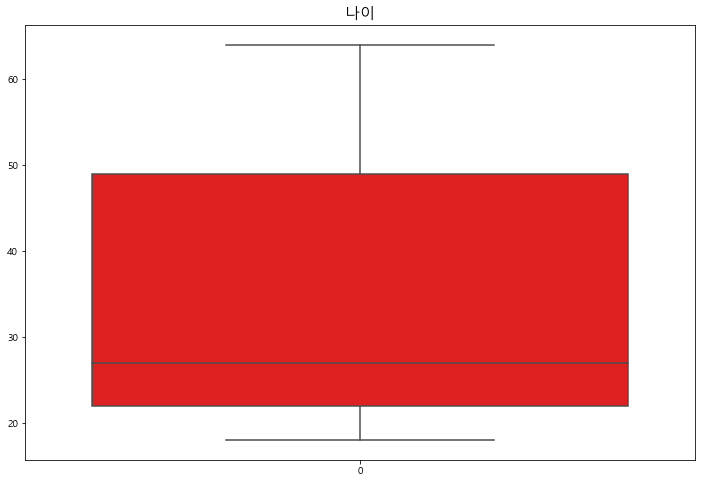

<AxesSubplot:>

Text(0.5, 1.0, '신장(cm)')

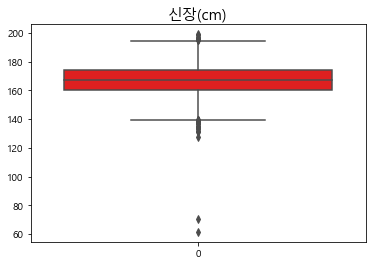

<AxesSubplot:>

Text(0.5, 1.0, '체중(kg)')

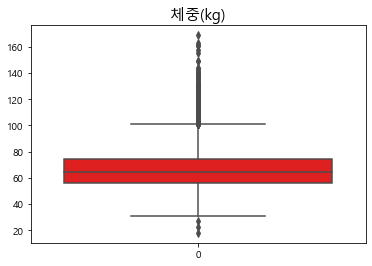

<AxesSubplot:>

Text(0.5, 1.0, '체지방율(%)')

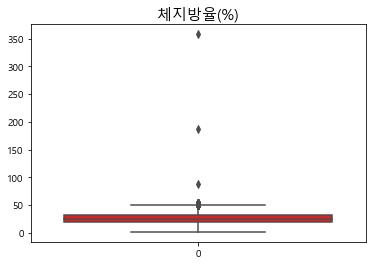

<AxesSubplot:>

Text(0.5, 1.0, '이완기혈압(최저)')

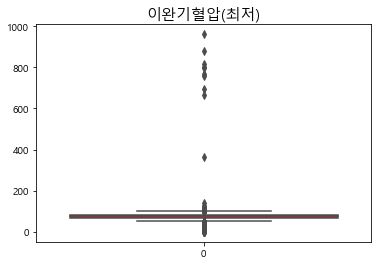

<AxesSubplot:>

Text(0.5, 1.0, '수축기혈압(최고)')

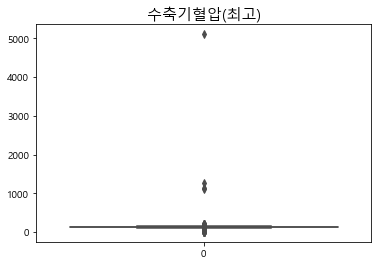

<AxesSubplot:>

Text(0.5, 1.0, '앉아윗몸앞으로굽히기(cm)')

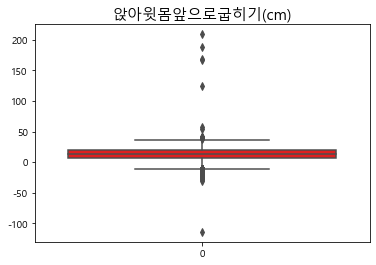

<AxesSubplot:>

Text(0.5, 1.0, '교차윗몸일으키기(회)')

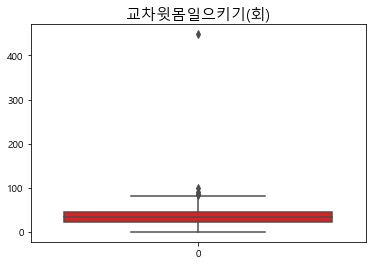

<AxesSubplot:>

Text(0.5, 1.0, '왕복오래달리기(회)')

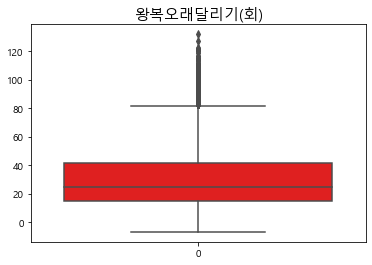

<AxesSubplot:>

Text(0.5, 1.0, '10M 4회 왕복달리기(초)')

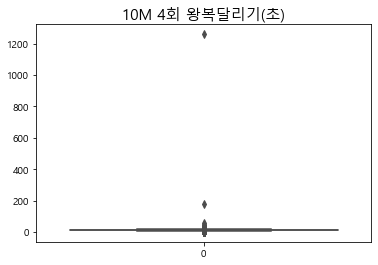

<AxesSubplot:>

Text(0.5, 1.0, '제자리 멀리뛰기(cm)')

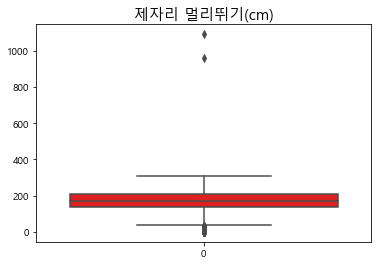

<AxesSubplot:>

Text(0.5, 1.0, '상대악력(%)')

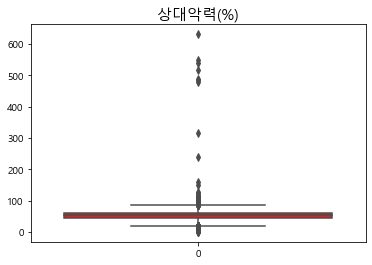

In [15]:
# 박스 플롯
plt.figure(figsize = (12,8))
for i in range(0,12):
    sns.boxplot(data = df[df.columns[i]],color = 'red' )
    plt.title(df.columns[i], size=15)
    plt.show()

In [16]:
df.describe()

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),성별
count,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000,77730.000000
mean,34.618243,167.080305,65.933987,25.554479,77.026525,125.483378,12.420253,33.848249,30.296009,12.618279,172.637998,53.100683,0.512685
std,15.085226,8.964393,12.747167,8.323080,12.642672,23.592848,9.575798,16.138366,19.454985,5.173523,44.708314,13.138056,0.499842
min,18.000000,61.400000,17.900000,1.600000,0.000000,0.000000,-114.000000,0.000000,-6.700000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,160.200000,56.000000,19.500000,70.000000,116.000000,6.800000,22.000000,15.000000,10.820000,140.000000,44.300000,0.000000
50%,27.000000,167.200000,64.700000,25.400000,77.000000,124.000000,13.500000,34.000000,25.000000,12.280000,172.000000,52.500000,1.000000
75%,49.000000,174.000000,74.100000,31.500000,83.000000,134.000000,19.200000,46.000000,42.000000,13.930000,209.000000,61.500000,1.000000
max,64.000000,199.100000,168.900000,358.000000,961.000000,5109.000000,209.000000,448.000000,132.000000,1260.000000,1091.000000,630.900000,1.000000


##### IQR Rule 을 활용하여 이상치 제거

In [17]:
import numpy as np

def IQR_Rule(val_list):# 피처 한개에 대해 작업
    # IQR 계산
    Q1 = np.quantile(val_list,0.25)
    Q3 = np.quantile(val_list,0.75)
    
    IQR = Q3 - Q1 
    
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    return not_outlier_condition

In [18]:
conditions = df.apply(IQR_Rule)
conditions

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),성별
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105580,True,True,True,True,True,True,True,True,True,True,True,True,True
105581,True,True,True,True,True,True,True,True,True,True,True,True,True
105582,True,True,True,True,True,True,True,True,True,True,True,True,True
105585,True,True,True,True,True,True,True,True,True,True,True,True,True


In [19]:
conditions.sum(axis=1) == len(df.columns)
# 이상치 제거 값 저장
total_cond = conditions.sum(axis=1) == len(df.columns)

df1 = df.loc[total_cond]

0         True
1         True
2         True
5         True
6         True
          ... 
105580    True
105581    True
105582    True
105585    True
105587    True
Length: 77730, dtype: bool

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='나이', ylabel='Count'>

Text(0.5, 1.0, '나이')

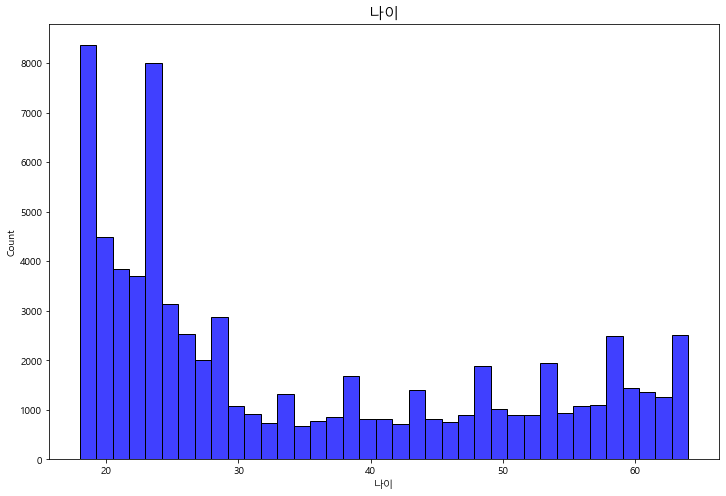

<AxesSubplot:xlabel='신장(cm)', ylabel='Count'>

Text(0.5, 1.0, '신장(cm)')

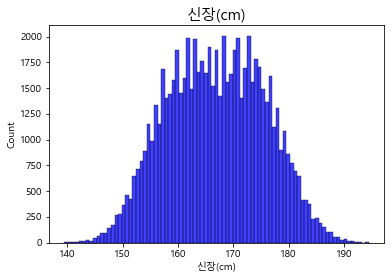

<AxesSubplot:xlabel='체중(kg)', ylabel='Count'>

Text(0.5, 1.0, '체중(kg)')

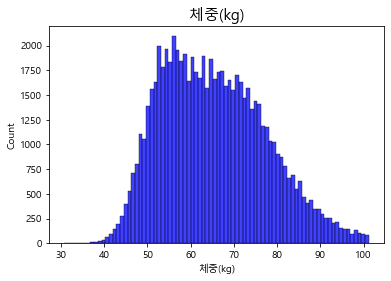

<AxesSubplot:xlabel='체지방율(%)', ylabel='Count'>

Text(0.5, 1.0, '체지방율(%)')

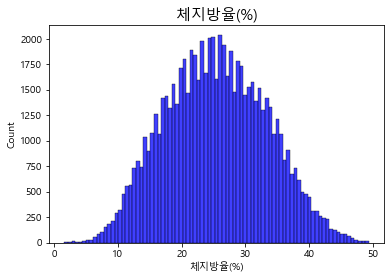

<AxesSubplot:xlabel='이완기혈압(최저)', ylabel='Count'>

Text(0.5, 1.0, '이완기혈압(최저)')

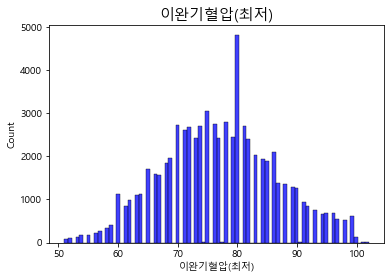

<AxesSubplot:xlabel='수축기혈압(최고)', ylabel='Count'>

Text(0.5, 1.0, '수축기혈압(최고)')

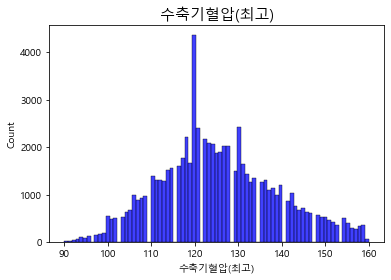

<AxesSubplot:xlabel='앉아윗몸앞으로굽히기(cm)', ylabel='Count'>

Text(0.5, 1.0, '앉아윗몸앞으로굽히기(cm)')

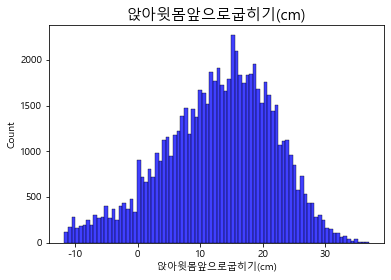

<AxesSubplot:xlabel='교차윗몸일으키기(회)', ylabel='Count'>

Text(0.5, 1.0, '교차윗몸일으키기(회)')

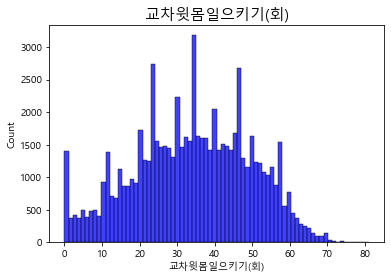

<AxesSubplot:xlabel='왕복오래달리기(회)', ylabel='Count'>

Text(0.5, 1.0, '왕복오래달리기(회)')

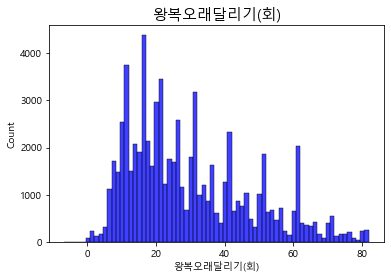

<AxesSubplot:xlabel='10M 4회 왕복달리기(초)', ylabel='Count'>

Text(0.5, 1.0, '10M 4회 왕복달리기(초)')

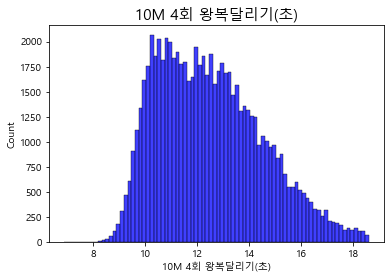

<AxesSubplot:xlabel='제자리 멀리뛰기(cm)', ylabel='Count'>

Text(0.5, 1.0, '제자리 멀리뛰기(cm)')

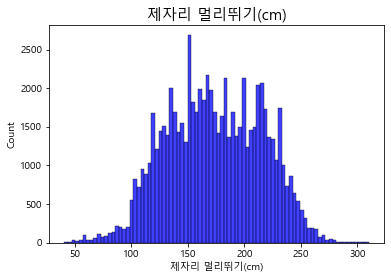

<AxesSubplot:xlabel='상대악력(%)', ylabel='Count'>

Text(0.5, 1.0, '상대악력(%)')

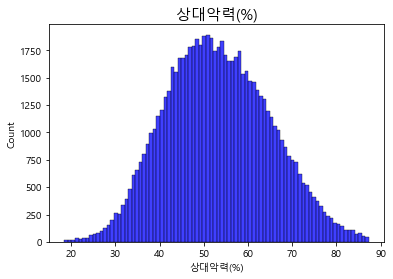

In [20]:
# 이상치 제거 후 히스토 플롯
plt.figure(figsize = (12,8))
for i in range(0,12):
    sns.histplot(data = df1[df1.columns[i]] ,color = 'blue' )
    plt.title(df1.columns[i], size=15)
    plt.show()

In [21]:
df1.describe()

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),성별
count,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000,71963.000000
mean,34.596001,166.956977,65.377138,25.467367,77.016586,125.383674,12.980309,34.036470,29.949940,12.498616,173.754049,53.212049,0.501522
std,14.989858,8.793646,12.007567,7.943251,9.589346,13.515543,8.775129,15.606776,17.849963,2.020427,41.796926,11.733371,0.500001
min,18.000000,139.500000,30.800000,1.600000,51.000000,90.000000,-11.700000,0.000000,-6.700000,6.900000,41.000000,18.500000,0.000000
25%,22.000000,160.200000,55.800000,19.600000,70.000000,116.000000,7.300000,23.000000,16.000000,10.860000,141.000000,44.700000,0.000000
50%,27.000000,167.000000,64.300000,25.300000,77.000000,124.000000,13.800000,35.000000,25.000000,12.280000,172.000000,52.700000,1.000000
75%,48.000000,173.700000,73.700000,31.300000,83.000000,134.000000,19.400000,46.000000,42.000000,13.850000,208.000000,61.400000,1.000000
max,64.000000,194.500000,101.200000,49.400000,102.000000,160.000000,37.000000,81.000000,82.000000,18.590000,310.000000,87.300000,1.000000


In [22]:
df1['왕복오래달리기(회)'] = df1['왕복오래달리기(회)'].abs()

<ipython-input-22-2b7abda28d49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['왕복오래달리기(회)'] = df1['왕복오래달리기(회)'].abs()


<Figure size 1296x1008 with 0 Axes>

<AxesSubplot:>

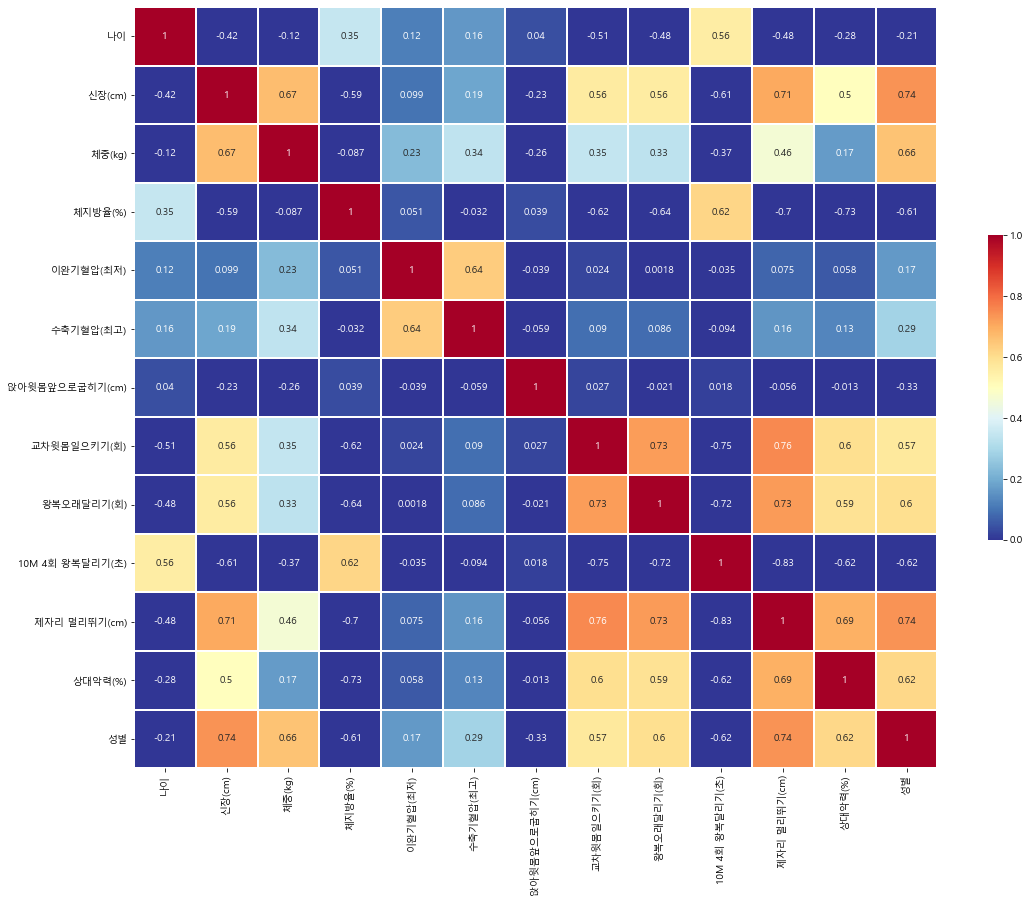

In [23]:
mat = np.zeros_like(df1.corr(method = 'pearson'))

# 상관관계 
plt.figure(figsize=(18,14))
sns.heatmap(df1.corr(method = 'pearson'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

##### 성별을 구분하여 작업

In [25]:
## 군집화를 위해 DF로 변환_
df_1=pd.DataFrame(data=df1,columns=df1.columns)
df_1.head(5)

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),성별
0,19,166.4,59.80,33.54784,77.0,114.0,35.2,35.0,21.0,11.89,170.0,42.6,0
1,55,159.8,60.00,34.00000,93.0,149.0,13.2,15.0,10.0,17.79,113.0,39.4,0
2,52,163.3,62.06,28.60000,78.0,134.0,21.7,22.0,14.0,15.23,130.0,40.9,0
5,63,172.3,77.80,26.20000,73.0,126.0,13.2,27.0,18.0,13.82,160.0,45.7,1
6,62,160.1,62.40,26.50000,70.0,128.0,17.0,32.0,16.0,12.42,196.0,65.5,1


In [26]:
df_1_f = df_1[df_1['성별']==0]
df_1_m = df_1[df_1['성별']==1]

In [27]:
df_1_f.drop(['성별'],axis=1, inplace=True)
df_1_m.drop(['성별'],axis=1, inplace = True)

C:\Users\82104\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##### k 값을 찾기 위해 elbow curve 활용

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

Text(0.5, 1.0, 'Elbow curve')

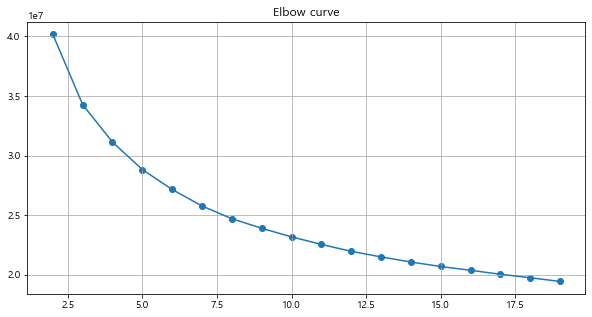

In [28]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_1_f)
    distortions.append(kmeans.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.scatter(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

Text(0.5, 1.0, 'Elbow curve')

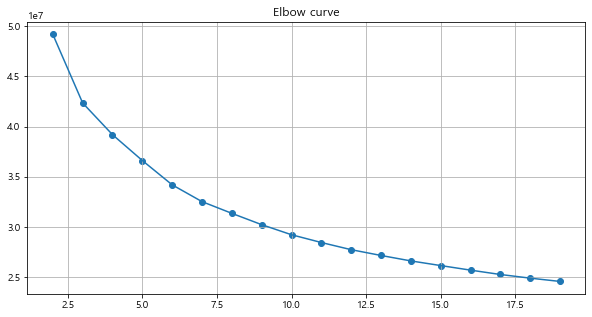

In [29]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_1_m)
    distortions.append(kmeans.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.scatter(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

#### 도메인 지식과 elbow curve 를 활용하여 k-means 사용

In [30]:
# KMeans(그룹 수, 초기 중심 설정 방식(디폴트:k-means++ or random), 최대 반복 횟수, 랜덤 스테이트)
kmeans_adult_female = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0).fit(df_1_f) 

# labels_속성을 통해 각 데이터 포인트별로 할당된 군집 중심점을 확인
print(kmeans_adult_female.labels_)

# 클러스터 라벨 값 입력
df_1_f['cluster']=kmeans_adult_female.labels_
df_1_f

[0 2 1 ... 0 2 0]


<ipython-input-30-521b320e5e81>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_f['cluster']=kmeans_adult_female.labels_


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
0,19,166.4,59.80,33.54784,77.0,114.0,35.2,35.0,21.0,11.89,170.0,42.6,0
1,55,159.8,60.00,34.00000,93.0,149.0,13.2,15.0,10.0,17.79,113.0,39.4,2
2,52,163.3,62.06,28.60000,78.0,134.0,21.7,22.0,14.0,15.23,130.0,40.9,1
9,64,156.0,62.60,25.10000,78.0,129.0,13.1,10.0,10.0,16.53,125.0,44.4,2
23,52,152.4,60.10,38.30000,77.0,117.0,26.4,14.0,8.0,15.68,105.0,41.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105573,19,154.5,44.40,23.40000,57.0,108.0,13.2,23.0,21.0,12.53,153.0,55.1,3
105580,21,157.1,52.60,31.60000,84.0,121.0,19.8,12.0,14.0,12.46,163.0,50.0,3
105582,25,172.1,55.80,14.20000,75.0,121.0,20.2,36.0,28.0,14.25,152.0,42.6,0
105585,50,165.6,80.90,33.90000,75.0,118.0,19.4,16.0,12.0,15.86,116.0,34.2,2


In [80]:
# KMeans(그룹 수, 초기 중심 설정 방식(디폴트:k-means++ or random), 최대 반복 횟수, 랜덤 스테이트)
kmeans_adult_male = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0).fit(df_1_m) 

# labels_속성을 통해 각 데이터 포인트별로 할당된 군집 중심점을 확인
print(kmeans_adult_male.labels_)

# 클러스터 라벨 값 입력
df_1_m['cluster']=kmeans_adult_male.labels_
df_1_m

[1 1 1 ... 1 0 0]


<ipython-input-80-257e68925fe5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_m['cluster']=kmeans_adult_male.labels_


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
5,63,172.3,77.8,26.2,73.0,126.0,13.2,27.0,18.0,13.82,160.0,45.7,1
6,62,160.1,62.4,26.5,70.0,128.0,17.0,32.0,16.0,12.42,196.0,65.5,1
18,60,171.0,72.1,30.8,80.0,120.0,5.0,16.0,10.0,16.25,108.0,51.4,1
28,20,178.4,58.2,12.1,85.0,158.0,-2.0,47.0,46.0,10.70,207.0,74.3,0
29,25,179.3,64.2,11.7,74.0,120.0,0.1,34.0,71.0,10.60,217.0,74.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105574,24,186.6,70.5,12.5,76.0,129.0,12.3,54.0,80.0,9.71,260.0,76.1,2
105576,19,179.1,82.6,10.8,67.0,146.0,10.6,59.0,62.0,10.14,237.0,63.1,2
105577,55,178.7,72.9,14.9,78.0,126.0,15.8,35.0,52.0,12.24,174.0,55.6,1
105578,63,160.2,57.4,17.4,87.0,150.0,16.1,53.0,63.0,11.72,182.0,59.2,0


#### 실루엣 계수를 확인하기 위한 작업

In [39]:
X_features = df_1_f[df_1_f.columns[:]].values
# 군집화 수행 : 군집 5개로 구성
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features)

In [40]:
y_features = df_1_m[df_1_m.columns[:]].values
# 군집화 수행 : 군집 5개로 구성
kmeans = KMeans(n_clusters=6, random_state=0)
labels = kmeans.fit_predict(X_features)

In [41]:
# print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features,labels)))

In [42]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [43]:
def visualize_silhouette(cluster_lists, y_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(y_features)
        
        sil_avg = silhouette_score(y_features, cluster_labels)
        sil_values = silhouette_samples(y_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

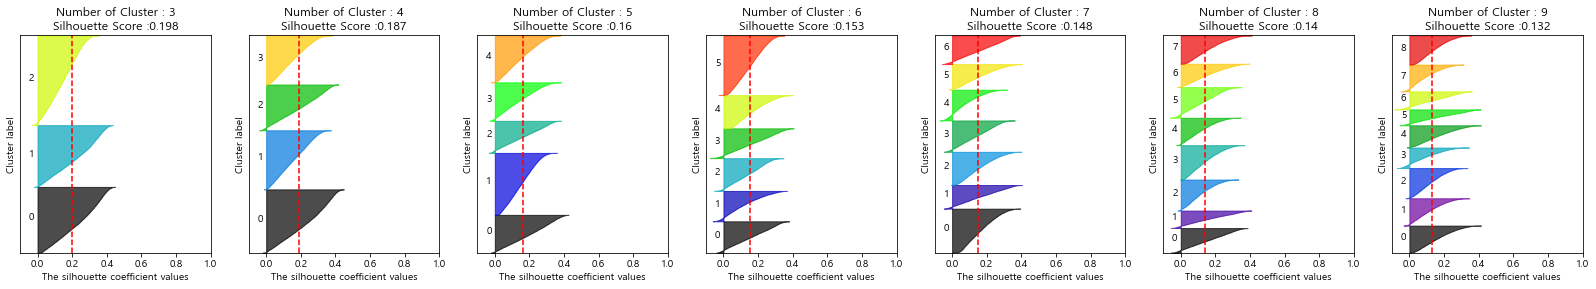

In [44]:
visualize_silhouette([ 3,4,5,6,7,8,9 ], X_features)

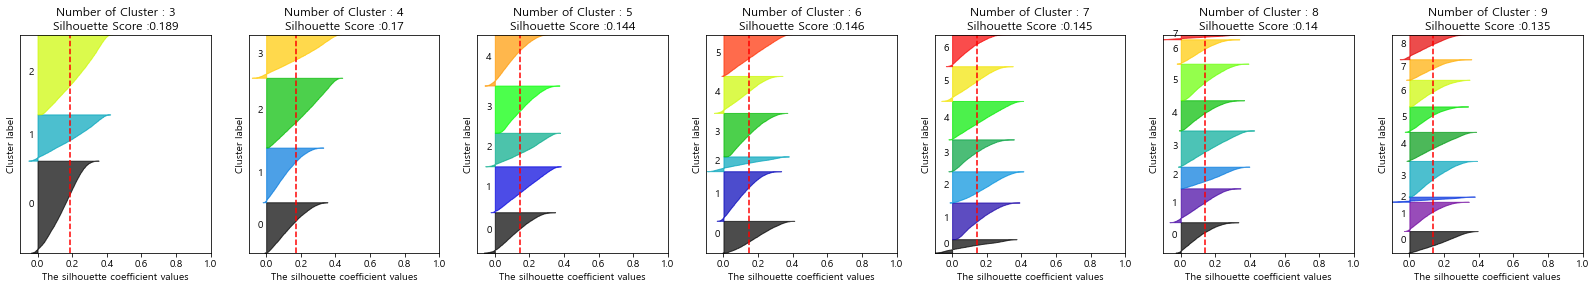

In [45]:
visualize_silhouette([ 3,4,5,6,7,8,9 ], y_features)

#### 처방 컬럼을 1개의 값으로 만들기 위한 작업

In [46]:
to_list = ['본운동', '준비운동', '마무리운동']

for j in to_list:
    for i in range(len(exer_df)):
        if exer_df[j][i] == "['N']":
            exer_df[j][i] = ''
        else:
            pass

In [47]:
abc = "[", "]" , "'"
df_data = exer_df[['본운동','준비운동','마무리운동']]

for i in to_list :
    for k in abc :
        for j in range(len(df_data)) :
            df_data[i][j] = df_data[i][j].replace(k, '')

In [48]:
df_data['운동처방'] = df_data['준비운동'] + "," + df_data['본운동'] + "," + df_data['마무리운동']
df_data.drop(['본운동','마무리운동','준비운동'],axis=1,inplace=True)

In [49]:
df_data

,운동처방
0,",Ah003, Ak003, Ao000, Ae028, Ag013, Aa028, Ce1..."
1,",Ce206, Ce205, Ce202, Ce200, Ce204,"
2,"Bq008, Bk011, Be084,Ce204, Ce203, Ce201, Ce170..."
3,"Ce174,Ag029, Ae012, Aa028, De115, Ad010, Ag026,"
4,"Ce174,Ag029, Ae012, Aa028, De115, Ad010, Ag026,"
...,...
105583,"Ce195, Ce194, Ce193, Be084,Ce202, Ce201, Ce200..."
105584,"Bq008, Bk011, Be085, Be084, Be083,Ak005, Aa028..."
105585,"Bp017, Bd024, Ba059,Aa033, Aa009, Aa031, Ac008..."
105586,",Ag029, Ag026, Ag025, Ap007, Ap005, As005, Al0..."


In [50]:
df_data = pd.DataFrame(df_data)


temp = []
for i in range(len(df_data)):
    temp.append(df_data['운동처방'][i].split(','))

df_data['운동처방1'] = temp

print(df_data)

                                                     운동처방  \
0       ,Ah003, Ak003, Ao000, Ae028, Ag013, Aa028, Ce1...   
1                     ,Ce206, Ce205, Ce202, Ce200, Ce204,   
2       Bq008, Bk011, Be084,Ce204, Ce203, Ce201, Ce170...   
3         Ce174,Ag029, Ae012, Aa028, De115, Ad010, Ag026,   
4         Ce174,Ag029, Ae012, Aa028, De115, Ad010, Ag026,   
...                                                   ...   
105583  Ce195, Ce194, Ce193, Be084,Ce202, Ce201, Ce200...   
105584  Bq008, Bk011, Be085, Be084, Be083,Ak005, Aa028...   
105585  Bp017, Bd024, Ba059,Aa033, Aa009, Aa031, Ac008...   
105586  ,Ag029, Ag026, Ag025, Ap007, Ap005, As005, Al0...   
105587  Aa028, Ag029, Ag026, Ag022,Br006, Bk010, Bs027...   

                                                    운동처방1  
0       [, Ah003,  Ak003,  Ao000,  Ae028,  Ag013,  Aa0...  
1             [, Ce206,  Ce205,  Ce202,  Ce200,  Ce204, ]  
2       [Bq008,  Bk011,  Be084, Ce204,  Ce203,  Ce201,...  
3       [Ce174, Ag029,  Ae0

In [51]:
result = df_data['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts())

          101186
 Bk011     27543
 Ag026     25466
Be085      25392
 Bq007     22082
           ...  
Bc009          1
 Be070         1
Al014          1
Af002          1
 De143         1
Name: index, Length: 757, dtype: int64


##### 군집화 된 결과와 처방 컬럼을 합침

In [81]:
fin_df_f = df_1_f.join(df_data,how='inner')
fin_df_m = df_1_m.join(df_data,how='inner')

In [53]:
fin_df_f.head(5)
fin_df_m.head(5)

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster,운동처방,운동처방1
0,19,166.4,59.80,33.54784,77.0,114.0,35.2,35.0,21.0,11.89,170.0,42.6,0,",Ah003, Ak003, Ao000, Ae028, Ag013, Aa028, Ce1...","[, Ah003, Ak003, Ao000, Ae028, Ag013, Aa0..."
1,55,159.8,60.00,34.00000,93.0,149.0,13.2,15.0,10.0,17.79,113.0,39.4,2,",Ce206, Ce205, Ce202, Ce200, Ce204,","[, Ce206, Ce205, Ce202, Ce200, Ce204, ]"
2,52,163.3,62.06,28.60000,78.0,134.0,21.7,22.0,14.0,15.23,130.0,40.9,1,"Bq008, Bk011, Be084,Ce204, Ce203, Ce201, Ce170...","[Bq008, Bk011, Be084, Ce204, Ce203, Ce201,..."
9,64,156.0,62.60,25.10000,78.0,129.0,13.1,10.0,10.0,16.53,125.0,44.4,2,",Be073, Be072, Ae035,","[, Be073, Be072, Ae035, ]"
23,52,152.4,60.10,38.30000,77.0,117.0,26.4,14.0,8.0,15.68,105.0,41.9,2,",Ce206, Ce200, Ce170,","[, Ce206, Ce200, Ce170, ]"


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster,운동처방,운동처방1
5,63,172.3,77.8,26.2,73.0,126.0,13.2,27.0,18.0,13.82,160.0,45.7,3,"Bq008, Bk011,Al017, As009, Aa028, Ad010, Ce202...","[Bq008, Bk011, Al017, As009, Aa028, Ad010,..."
6,62,160.1,62.4,26.5,70.0,128.0,17.0,32.0,16.0,12.42,196.0,65.5,2,"Bq008, Bk011,Al017, As009, Aa028, Ad010, Ce202...","[Bq008, Bk011, Al017, As009, Aa028, Ad010,..."
18,60,171.0,72.1,30.8,80.0,120.0,5.0,16.0,10.0,16.25,108.0,51.4,3,"Ag026, Ap005, Bq008, Bq007, Bk011, Br006,Ae012...","[Ag026, Ap005, Bq008, Bq007, Bk011, Br006..."
28,20,178.4,58.2,12.1,85.0,158.0,-2.0,47.0,46.0,10.70,207.0,74.3,4,"Be084, Bq008, Bk011,Aa028, Ag029, Ag026, Ai012...","[Be084, Bq008, Bk011, Aa028, Ag029, Ag026,..."
29,25,179.3,64.2,11.7,74.0,120.0,0.1,34.0,71.0,10.60,217.0,74.7,0,"Be084, Bq008, Bk011,Aa028, Ag029, Ag026, Ai012...","[Be084, Bq008, Bk011, Aa028, Ag029, Ag026,..."


##### 군집 6개로 분류(남자)

In [82]:
a1 = fin_df_m[fin_df_m['cluster']==0]
a2 = fin_df_m[fin_df_m['cluster']==1]
a3 = fin_df_m[fin_df_m['cluster']==2]
a4 = fin_df_m[fin_df_m['cluster']==3]
a5 = fin_df_m[fin_df_m['cluster']==4]
a6 = fin_df_m[fin_df_m['cluster']==5]

In [55]:
# 5점 척도 표현
# a1 = 근력 : 보통이하(2), 근지구력 : 보통(3), 심폐지구력 : 나쁨(1) , 유연성 : 보통(3) 민첩성 : 3  순발력 :2
a1.describe()
# a2 = 근력 : 나쁨(1), 근지구력 : 나쁨(1), 심폐지구력 : 나쁨(1) , 유연성 : 나쁨(1) 민천성 : 2  순발력 : 1 
a2.describe()
# a3 = 근력 : 좋음(5), 근지구력 : 보통(3), 심폐지구력 : 나쁨(1) , 유연성 : 나쁨(1) 민첩성 : 4  순발력 : 5
a3.describe()
# a4 = 근력 : 좋음(5), 근지구력 : 보통 이상(4), 심폐지구력 : 보통 이상(4) , 유연성 : 보통 이상(4)  민첩성 : 2 순발력 : 1
a4.describe() 
# a5 = 근력 : 보통 이하(2), 근지구력 : 나쁨(1), 심폐지구력 : 나쁨(1) , 유연성 : 나쁨(1)  민첩성 : 4 순발력 : 4
a5.describe()
# a6 = 근력 : 보통 이상(4), 근지구력 : 보통(3), 심폐지구력 : 나쁨(1) , 유연성 : 보통(3) 민첩성 : 4  순발력 : 5
a6.describe()

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.0
mean,24.463897,173.275997,69.791006,17.755729,74.230137,122.897129,10.639707,49.414413,57.097156,10.691178,209.225815,63.403931,0.0
std,6.834995,5.346395,8.484361,4.766497,8.586892,10.755927,8.025500,8.757757,10.620714,0.918740,11.055783,8.697716,0.0
min,19.000000,150.600000,42.600000,2.000000,51.000000,90.000000,-11.600000,0.000000,21.000000,6.900000,165.000000,26.100000,0.0
25%,20.000000,169.600000,63.985000,14.400000,68.000000,116.000000,5.500000,44.000000,50.000000,10.090000,201.000000,57.600000,0.0
50%,22.000000,173.200000,69.300000,17.600000,74.000000,122.000000,11.200000,50.000000,56.000000,10.540000,211.000000,63.200000,0.0
75%,26.000000,176.800000,75.100000,20.900000,80.000000,129.000000,16.475000,55.000000,63.000000,11.090000,218.000000,69.200000,0.0
max,64.000000,192.500000,101.000000,41.100000,101.000000,160.000000,37.000000,78.000000,82.000000,18.240000,234.000000,87.200000,0.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6105.0
mean,24.938903,173.687043,75.382483,23.601867,77.190254,126.520885,5.685704,39.667617,34.855097,11.628416,182.014251,55.298034,1.0
std,6.347777,5.641777,10.978223,6.049237,9.190287,11.998591,8.322950,9.651041,12.203600,1.147052,12.478302,8.887355,0.0
min,19.000000,147.100000,38.200000,3.800000,51.000000,91.000000,-11.700000,0.000000,0.000000,8.070000,130.000000,19.100000,1.0
25%,20.000000,170.000000,67.500000,19.400000,71.000000,119.000000,0.000000,33.000000,26.000000,10.870000,174.000000,49.200000,1.0
50%,23.000000,173.700000,75.100000,23.600000,78.000000,126.000000,5.600000,40.000000,34.000000,11.410000,184.000000,54.900000,1.0
75%,27.000000,177.400000,83.000000,27.800000,83.000000,134.000000,11.400000,46.000000,42.000000,12.130000,192.000000,60.900000,1.0
max,57.000000,193.100000,101.200000,45.100000,102.000000,160.000000,34.300000,73.000000,81.000000,18.560000,207.000000,87.300000,1.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.0
mean,53.550408,169.881811,72.020197,23.579731,82.968369,135.464591,9.574164,32.564838,25.103438,12.389102,184.989747,58.290146,2.0
std,7.824841,5.376124,8.927968,5.182137,9.245678,13.458042,7.566422,9.070478,9.375582,1.110303,12.082963,8.139986,0.0
min,20.000000,149.900000,45.200000,3.200000,51.000000,91.000000,-11.600000,0.000000,0.000000,8.700000,153.000000,27.800000,2.0
25%,48.000000,166.200000,65.800000,20.200000,77.000000,125.000000,4.700000,27.000000,18.000000,11.610000,175.000000,52.700000,2.0
50%,55.000000,170.000000,71.500000,23.600000,83.000000,135.000000,10.000000,32.000000,24.000000,12.250000,185.000000,58.200000,2.0
75%,60.000000,173.500000,77.500000,27.000000,90.000000,146.000000,15.000000,39.000000,31.000000,12.960000,194.000000,63.500000,2.0
max,64.000000,191.400000,101.200000,43.500000,101.000000,160.000000,37.000000,65.000000,72.000000,18.360000,228.000000,86.400000,2.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,2439.000000,2439.00000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.00000,2439.000000,2439.000000,2439.000000,2439.000000,2439.0
mean,50.160722,168.87991,72.766154,26.888781,80.292128,131.154982,5.010226,24.00615,16.985658,13.910127,144.780238,50.738294,3.0
std,14.416872,6.61703,10.865784,6.334734,9.548205,13.813468,8.157776,10.18538,8.449136,1.505046,21.540471,9.738693,0.0
min,19.000000,142.00000,39.800000,2.800000,51.000000,91.000000,-11.700000,0.00000,0.000000,9.980000,41.000000,19.300000,3.0
25%,42.000000,164.90000,65.600000,22.800000,74.000000,121.000000,-0.500000,18.00000,11.000000,12.840000,135.000000,44.850000,3.0
50%,56.000000,169.00000,72.300000,27.100000,80.000000,131.000000,4.900000,24.00000,16.000000,13.780000,152.000000,50.900000,3.0
75%,61.000000,173.00000,79.600000,31.100000,87.000000,141.000000,10.800000,30.00000,21.000000,14.855000,160.000000,57.200000,3.0
max,64.000000,191.00000,101.100000,48.200000,102.000000,160.000000,30.300000,67.00000,78.000000,18.580000,176.000000,83.100000,3.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.0
mean,28.701536,175.180639,76.113138,21.173155,81.505974,133.104852,10.405758,43.185735,34.383046,10.940248,217.075847,60.689905,4.0
std,8.882213,5.533111,9.791565,5.365303,9.076167,12.238175,7.964762,9.399496,10.936107,1.075953,10.788466,8.751470,0.0
min,19.000000,148.300000,43.300000,2.000000,51.000000,93.000000,-11.700000,0.000000,0.000000,7.690000,188.000000,29.600000,4.0
25%,22.000000,171.500000,69.400000,17.500000,75.000000,124.000000,5.425000,37.000000,28.000000,10.280000,210.000000,54.500000,4.0
50%,26.000000,175.100000,75.600000,21.100000,81.000000,132.000000,11.000000,44.000000,35.000000,10.750000,216.000000,60.500000,4.0
75%,33.000000,178.900000,82.500000,24.800000,88.000000,142.000000,16.000000,50.000000,42.000000,11.310000,224.000000,66.600000,4.0
max,64.000000,194.100000,101.200000,41.000000,102.000000,160.000000,36.000000,75.000000,66.000000,18.510000,266.000000,87.300000,4.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.0
mean,24.174826,175.711660,72.716033,15.946720,77.058922,128.345307,15.185101,53.446118,56.343746,10.072062,241.253331,66.570032,5.0
std,5.509845,5.347453,8.625307,4.509872,8.912178,12.133300,7.609724,8.484257,12.828059,0.880620,12.238598,8.408087,0.0
min,18.000000,148.000000,45.600000,1.600000,51.000000,92.000000,-11.700000,0.000000,2.000000,7.800000,218.000000,32.900000,5.0
25%,20.000000,172.100000,66.895000,12.800000,71.000000,120.000000,10.875000,49.000000,49.000000,9.540000,232.000000,60.800000,5.0
50%,23.000000,175.700000,72.200000,15.700000,77.000000,127.000000,16.000000,54.000000,57.000000,9.950000,239.000000,66.400000,5.0
75%,26.000000,179.400000,78.120000,18.925000,83.000000,137.000000,20.300000,59.000000,64.000000,10.410000,248.000000,72.200000,5.0
max,59.000000,194.500000,101.000000,38.200000,101.000000,160.000000,36.300000,81.000000,82.000000,18.380000,310.000000,87.300000,5.0


##### 카운트를 통해 군집에 가장 많이 처방 된 운동을 확인

In [56]:
result = a1['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          6453
Be085     1976
 Bk011    1842
 Ag026    1758
 Bq007    1717
 Ce203    1338
 Bq008    1338
 Ce204    1314
 Be085    1313
 Aa028    1291
 Be084    1126
Bq008     1116
 Bk010    1100
 Bp017    1049
 Ad010    1022
 Ba059    1019
 Bd024     990
 Ap007     978
 Br006     959
 Bg040     934
Name: index, dtype: int64


In [57]:
result = a2['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          5530
Be085     1688
 Ag026    1615
 Bk011    1524
 Bq007    1357
 Ce204    1275
 Ce203    1249
 Aa028    1246
 Ce170    1235
 Bq008    1156
 Be085    1114
 Ce201    1028
 Ad010     990
 Ag029     913
 Ba059     847
 Bk010     830
Bq008      807
 Ae012     799
 Ap005     781
 Ce202     768
Name: index, dtype: int64


In [58]:
result = a3['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          5628
 Bk011    1283
Be085     1282
 Ag026    1247
 Bq007    1145
 Bq008    1088
 Ce204    1032
 Ce203     997
 Ce170     972
 Be085     953
 Aa028     918
 Ce201     906
 Ba055     862
 Ba059     795
 Bd024     745
 Ap007     744
 Ag029     718
Bq008      714
 Be084     687
 Ap005     684
Name: index, dtype: int64


In [59]:
result = a4['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          2479
 Ag026     675
Be085      609
 Be085     588
 Bk011     588
 Bq007     580
 Ce170     579
 Ce204     579
 Bq008     573
 Ce201     566
 Aa028     563
 Ce203     560
 Ap007     429
 Ag029     413
 Ad010     396
 Be084     366
 Ba059     364
 Ag025     360
 Ae012     347
 Ce206     340
Name: index, dtype: int64


In [60]:
result = a5['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          7887
 Bk011    2155
Be085     2113
 Ag026    1986
 Ce170    1908
 Ce204    1869
 Ce203    1860
 Bq007    1833
 Aa028    1732
 Ce201    1708
 Bq008    1556
 Be085    1433
Ce206     1405
 Ce202    1334
 Ad010    1257
Bq008     1252
 Ag029    1182
 Ba059    1127
 Ae012    1053
 Ce206    1043
Name: index, dtype: int64


In [61]:
result = a6['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          6826
 Bk011    1669
Be085     1666
 Ag026    1592
 Bq007    1298
 Ce203    1218
 Aa028    1191
 Ce204    1154
 Bq008    1138
 Ad010    1128
 Be085    1049
Bq008      984
 Ba059     917
 Ce170     900
 Bk010     890
 Ae012     883
 Bd024     869
 Be084     861
 Ag029     844
 Ce201     844
Name: index, dtype: int64


##### 군집을 4개로 분류 (여자)

In [62]:
b1 = fin_df_f[fin_df_f['cluster']==0]
b2 = fin_df_f[fin_df_f['cluster']==1]
b3 = fin_df_f[fin_df_f['cluster']==2]
b4 = fin_df_f[fin_df_f['cluster']==3]

In [63]:
# 5점 척도 표현
# b1 = 근력 : 좋음(5), 근지구력 : 좋음(5), 심폐지구력 : 좋음(5) , 유연성 : 좋음(5) 민첩성 : 5 순발력 : 5
b1.describe()
# b2 = 근력 : 보통이하(2), 근지구력 : 나쁨(1), 심폐지구력 : 나쁨(1) , 유연성 : 보통 이하(2) 민첩성 : 4 순발력 : 5
b2.describe()
# b3 = 근력 : 좋음(5), 근지구력 : 보통(3), 심폐지구력 : 보통(3) , 유연성 : 보통(3) 민첩성 : 3  순발력 : 1
b3.describe()
# b4 = 근력 : 보통 이상(4), 근지구력 : 보통 이하(2), 심폐지구력 : 나쁨(1) , 유연성 : 보통(3) 민첩성 :2 순발력 :2
b4.describe()

,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470.0
mean,26.410029,163.348691,55.935916,26.275418,74.779962,119.958835,19.368521,37.134871,27.889655,12.185753,173.323591,51.957383,0.0
std,8.312887,5.120965,7.274210,5.267354,9.006988,10.994442,6.982827,10.174008,9.975096,1.045318,14.042269,7.715469,0.0
min,19.000000,141.400000,34.700000,2.400000,51.000000,90.000000,-11.700000,0.000000,0.000000,8.840000,137.000000,19.800000,0.0
25%,21.000000,160.000000,51.000000,22.700000,69.000000,112.000000,15.300000,30.000000,21.000000,11.530000,163.000000,46.700000,0.0
50%,24.000000,163.300000,54.900000,26.000000,75.000000,120.000000,20.200000,37.000000,26.000000,12.120000,171.000000,51.700000,0.0
75%,28.000000,166.800000,59.700000,29.800000,81.000000,127.000000,24.100000,44.000000,32.000000,12.750000,181.000000,56.900000,0.0
max,64.000000,185.100000,100.300000,48.800000,100.000000,160.000000,37.000000,74.000000,82.000000,18.360000,265.000000,86.600000,0.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.0
mean,51.379842,158.245769,58.755039,31.597670,78.961880,127.765482,16.393055,21.826215,16.032832,14.178011,140.637861,45.022884,1.0
std,7.899597,5.100238,8.095195,5.582714,9.296734,13.178728,6.959398,9.539517,6.191083,1.130824,11.542268,7.296176,0.0
min,19.000000,140.700000,33.100000,1.800000,51.000000,90.000000,-11.500000,0.000000,0.000000,9.490000,112.000000,18.700000,1.0
25%,47.000000,154.800000,53.200000,27.900000,72.000000,119.000000,12.100000,15.000000,12.000000,13.380000,131.000000,40.300000,1.0
50%,52.000000,158.000000,57.600000,32.000000,79.000000,127.000000,17.100000,22.000000,15.000000,14.040000,139.500000,45.100000,1.0
75%,58.000000,161.700000,63.200000,35.400000,85.000000,136.000000,21.300000,28.000000,19.000000,14.850000,149.000000,49.700000,1.0
max,64.000000,178.400000,100.800000,49.400000,102.000000,160.000000,35.000000,57.000000,80.000000,18.590000,196.000000,81.400000,1.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.0
mean,53.752386,156.704494,59.892874,34.822715,76.313229,124.782383,13.516434,11.940496,10.813562,15.699653,106.530938,39.905103,2.0
std,10.533844,5.302412,8.811771,5.720437,9.284454,13.985419,7.733488,8.672550,4.524234,1.262218,15.115095,7.186276,0.0
min,19.000000,139.500000,30.800000,3.200000,51.000000,90.000000,-11.300000,0.000000,0.000000,8.000000,44.000000,18.500000,2.0
25%,50.000000,153.000000,53.800000,31.400000,70.000000,115.000000,8.600000,5.000000,8.000000,14.800000,101.000000,35.100000,2.0
50%,57.000000,156.600000,58.870000,35.100000,76.000000,124.000000,14.300000,11.000000,10.000000,15.630000,110.000000,39.900000,2.0
75%,61.000000,160.000000,64.900000,38.600000,82.000000,134.000000,19.100000,18.000000,13.000000,16.570000,117.000000,44.700000,2.0
max,64.000000,182.800000,99.400000,49.400000,101.000000,160.000000,37.000000,79.000000,75.000000,18.590000,133.000000,82.200000,2.0


,나이,신장(cm),체중(kg),체지방율(%),이완기혈압(최저),수축기혈압(최고),앉아윗몸앞으로굽히기(cm),교차윗몸일으키기(회),왕복오래달리기(회),10M 4회 왕복달리기(초),제자리 멀리뛰기(cm),상대악력(%),cluster
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.0
mean,26.319217,161.966089,56.088648,30.123838,72.446596,115.331829,13.596181,24.981624,18.939341,13.571404,139.435254,44.986464,3.0
std,7.787358,5.284244,8.193778,5.698963,8.782671,10.447098,8.610320,9.536047,6.804859,1.155809,13.048862,7.666301,0.0
min,19.000000,140.400000,32.400000,3.560000,51.000000,90.000000,-11.700000,0.000000,0.000000,9.300000,98.000000,18.900000,3.0
25%,20.000000,158.400000,50.500000,26.100000,66.000000,108.000000,8.200000,19.000000,14.000000,12.780000,130.000000,39.700000,3.0
50%,24.000000,162.000000,54.860000,30.000000,72.000000,115.000000,14.500000,25.000000,18.000000,13.400000,141.000000,44.800000,3.0
75%,30.000000,165.500000,60.000000,33.900000,79.000000,122.000000,19.800000,31.000000,22.000000,14.190000,150.000000,50.000000,3.0
max,60.000000,181.900000,101.000000,48.800000,100.000000,159.000000,36.200000,57.000000,58.000000,18.580000,170.000000,79.100000,3.0


In [64]:
result = b1['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          10742
 Ag026     2473
Be085      2454
 Bk011     2389
 Aa028     2041
 Ce203     1840
 Ce204     1808
 Bq007     1783
 Ce170     1646
 Bq008     1637
 Ad010     1625
 Be085     1586
 Ce201     1584
 Ce202     1553
 Ba055     1532
 Ba059     1451
 Bd024     1405
Ce206      1384
 Ae012     1373
Bq008      1308
Name: index, dtype: int64


In [65]:
result = b2['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          7702
 Bk011    2640
Be085     2118
 Ce203    2038
 Ag026    1961
 Aa028    1841
 Ce204    1829
Bq008     1788
 Be085    1716
 Ce201    1638
 Bq007    1596
 Ce170    1481
 Bq008    1435
 Ad010    1260
 Ba055    1259
 Ag029    1244
 Ba059    1200
 Bd024    1148
 Ae012    1122
 Ap007    1120
Name: index, dtype: int64


In [66]:
result = b3['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          7227
 Bk011    2265
 Ag026    2089
Be085     1927
 Be085    1838
 Ce203    1821
 Aa028    1793
 Ce204    1790
Bq008     1614
 Ce201    1561
 Bq007    1509
 Ce170    1470
 Bq008    1421
 Ad010    1417
 Ag029    1394
 Ap007    1336
 Ae012    1172
 Be084    1169
 Ag025    1088
 Ba059    1072
Name: index, dtype: int64


In [67]:
result = b4['운동처방'].str.split(',', expand=True)

temp = result.melt(var_name='col', value_name='index')

print(temp['index'].value_counts()[:20])

          9693
 Ag026    2811
 Bk011    2443
Be085     2351
 Aa028    2086
 Ce203    2071
 Ce204    2034
 Bq007    1979
 Ce170    1944
 Be085    1697
 Bq008    1686
 Ce201    1658
 Ce202    1555
 Ag029    1495
 Ad010    1491
 Ae012    1487
Bq008     1413
 Ba059    1409
 Ba055    1368
 Ap007    1365
Name: index, dtype: int64
